In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
os.getcwd()

'E:\\Data Sci\\New\\Scaler\\DSML and Analytics 2022\\65. Netflix Case Study'

In [6]:
df = pd.read_csv(os.getcwd()+r"\netflix_titles\netflix_titles.csv")

In [7]:
df.head(10)

show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theodore Melfi   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
2                                                NaN  September 24, 2021   
3                                                NaN  September 24, 2021   
4                                              India  September 24, 2021   
5                                                NaN  September 24, 2021   
6                                                NaN  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   
9                                      United States  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   
5          2021  TV-MA   1 Season   
6          2021     PG     91 min   
7          1993  TV-MA    125 min   
8          2021  TV-14  9 Seasons   
9          2021  PG-13    104 min   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented 

In [12]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# 1. Viewership and Popularity Analysis:

- ### What are the most popular types of content on the platform (Movies or TV Shows)?

In [14]:
len(df)

8807

In [24]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [22]:
df['type'].describe()

count      8807
unique        2
top       Movie
freq       6131
Name: type, dtype: object

- Movies are more released than TV Shows

- ### Which countries contribute the most content?

In [23]:
df['country'].describe()

count              7976
unique              748
top       United States
freq               2818
Name: country, dtype: object

- US contributes the most

- ### Does the release year affect the popularity of content?

# 2. Content Duration Analysis:

- ### Are there any trends in content duration over the years?

In [41]:
list = []
for i in df['duration']:
    i = str(i)
    if i.endswith('min'):
        list.append(int(i.split()[0]))
    else:
        list.append(0)

In [60]:
df_2 = df.assign(duration_int = list)

In [68]:
df_updated = df_2.drop(df_2[df_2["duration_int"]==0].index)

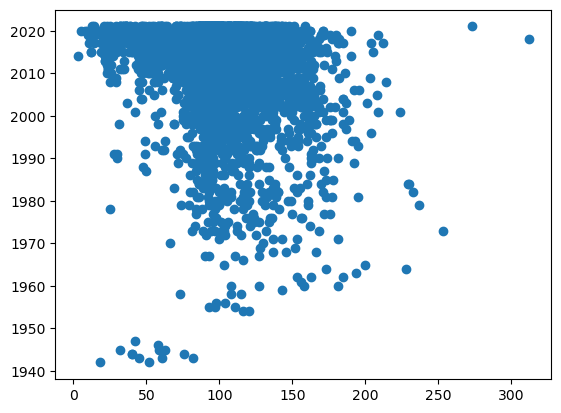

In [72]:
plt.scatter(df_updated['duration_int'],df_updated['release_year'])

In [73]:
np.corrcoef(df_updated['duration_int'],df_updated['release_year'])

array([[ 1.        , -0.20628475],
       [-0.20628475,  1.        ]])

Yes, the duratioin of movie is reducing by time somehow

# 3. Genre Analysis:

- ### Which genres are most prevalent on the platform?

In [79]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [80]:
df["listed_in"].describe()

count                             8807
unique                             514
top       Dramas, International Movies
freq                               362
Name: listed_in, dtype: object

In [81]:
df["listed_in"].dtype

dtype('O')

In [82]:
l = []
for i in df["listed_in"]:
    l.append(i.split(','))

In [86]:
l

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Dramas', ' International Movies'],
 ['Children & Family Movies', ' Comedies'],
 ['British TV Shows', ' Crime TV Shows', ' Docuseries'],
 ['TV Comedies', ' TV Dramas'],
 ['Documentaries', ' International Movies'],
 ['Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  ' Spanish-Language TV Shows',
  ' TV Action & Adventure'],
 ['Crime TV Shows', '

In [88]:
gen_sep = [gen for gen_list in l for gen in gen_list]

In [111]:
gen_ser = pd.Series(gen_sep)

In [113]:
gen_ser.value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
TV Sci-Fi & Fantasy             1
LGBTQ Movies                    1
Sports Movies                   1
Length: 73, dtype: int64

We can see which generes are most relevant in data

- ### Are there any trends in the popularity of specific genres?

# 4. Country Analysis:

- ### Do viewers have a preference for content from certain countries?

In [115]:
df['rating'].describe()

count      8803
unique       17
top       TV-MA
freq       3207
Name: rating, dtype: object

In [116]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [118]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

# Revision 2

## Unnesting the Data

In [8]:
#unnesting the directors column, i.e- creating separate lines for each director in a
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

title        Directors
0   Dick Johnson Is Dead  Kirsten Johnson
1          Blood & Water              nan
2              Ganglands  Julien Leclercq
3  Jailbirds New Orleans              nan
4           Kota Factory              nan

In [9]:
 #unnesting the cast column, i.e- creating separate lines for each cast member in a m
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

title          Actors
0  Dick Johnson Is Dead             nan
1         Blood & Water      Ama Qamata
2         Blood & Water     Khosi Ngema
3         Blood & Water   Gail Mabalane
4         Blood & Water  Thabang Molaba

In [10]:
#unnesting the listed_in column, i.e- creating separate lines for each genre in a mo
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

title                   Genre
0  Dick Johnson Is Dead           Documentaries
1         Blood & Water  International TV Shows
2         Blood & Water               TV Dramas
3         Blood & Water            TV Mysteries
4             Ganglands          Crime TV Shows

In [11]:
#unnesting the country column, i.e- creating separate lines for each country in a mo
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

title        country
0   Dick Johnson Is Dead  United States
1          Blood & Water   South Africa
2              Ganglands            nan
3  Jailbirds New Orleans            nan
4           Kota Factory          India

In [12]:
#merging the unnested director data with unnested actors data
df_new5=df_new2.merge(df_new1,on=['title'],how='inner')
#merging the above merged data with unnested genre data
df_new6=df_new5.merge(df_new3,on=['title'],how='inner')
#merging the above merged data with unnested country data
df_new=df_new6.merge(df_new4,on=['title'],how='inner')
#replacing nan values of director and actor by Unknown Actor and Director
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df_new['country'].replace(['nan'],[np.nan],inplace=True)
df_new.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country  
0           Documentaries  United States  
1  International TV Shows   South Africa  
2               TV Dramas   South Africa  
3            TV Mysteries   South Africa  
4  International TV Shows   South Africa

In [13]:
#merging our unnested data with the original data
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
 'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  
0          2020  PG-13     90 min  
1          2021  TV-MA  2 Seasons  
2          2021  TV-MA  2 Seasons  
3          2021  TV-MA  2 Seasons  
4          2021  TV-MA  2 Seasons

In [14]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'rating']
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [15]:
#Ratings can't be in min, so it has been made NR(i.e- Non Rated)
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
pd.set_option('display.max_rows',None)

In [16]:
#just an attempt to observe nulls in date_added column
df_final[df_final['date_added'].isnull()].head()

title            Actors  \
136893  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136894  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136895  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136896  A Young Doctor's Notebook and Other Stories          Jon Hamm   
136897  A Young Doctor's Notebook and Other Stories          Jon Hamm   

               Directors             Genre         country show_id     type  \
136893  Unknown Director  British TV Shows  United Kingdom   s6067  TV Show   
136894  Unknown Director       TV Comedies  United Kingdom   s6067  TV Show   
136895  Unknown Director         TV Dramas  United Kingdom   s6067  TV Show   
136896  Unknown Director  British TV Shows  United Kingdom   s6067  TV Show   
136897  Unknown Director       TV Comedies  United Kingdom   s6067  TV Show   

       date_added  release_year rating   duration  
136893        NaN          2013  TV-MA  2 Seasons  
136894        NaN          2013  TV-MA  2 Seasons  
136895        NaN          2013  TV-MA  2 Seasons  
136896        NaN          2013  TV-MA  2 Seasons  
136897        NaN          2013  TV-MA  2 Seasons

In [17]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added
#when release year was 2013.So below piece of code just checks the mode of date added for release year = 2013
# and imputes in place of nulls the corresponding mode
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [18]:
#country column is imputed on the basis of director,i.e- suppose there's a null for a country
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of
#country for the director
# and imputes in place of nulls the corresponding mode
for i in df_final[df_final['country'].isnull()]['Directors'].unique():
 if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
    imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

So we imputed the country column on the basis of directors whose other movie titles had countries given. But
there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a
basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis. For
remaining rows, country has been filled as Unknown Country

In [19]:
for i in df_final[df_final['country'].isnull()]['Actors'].unique():
 if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
    imp=df_final[df_final['Actors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Actors']==i,'country']=df_final.loc[df_final['Actors']==i,'country'].fillna(imp)
    #If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [20]:
df_final.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  
0          2020  PG-13     90 min  
1          2021  TV-MA  2 Seasons  
2          2021  TV-MA  2 Seasons  
3          2021  TV-MA  2 Seasons  
4          2021  TV-MA  2 Seasons

In [21]:
df_final['duration'].value_counts()

1 Season      35035
2 Seasons      9559
3 Seasons      5084
94 min         4343
106 min        4040
97 min         3624
95 min         3560
96 min         3484
93 min         3480
90 min         3305
105 min        3209
107 min        3103
101 min        3048
102 min        3017
103 min        2985
98 min         2984
99 min         2956
91 min         2915
92 min         2863
104 min        2822
88 min         2781
110 min        2711
100 min        2697
108 min        2614
112 min        2594
85 min         2486
89 min         2420
86 min         2213
4 Seasons      2134
116 min        2122
118 min        2119
119 min        2075
87 min         2063
109 min        2020
113 min        1990
120 min        1845
117 min        1770
121 min        1728
5 Seasons      1698
111 min        1667
124 min        1590
114 min        1529
127 min        1505
115 min        1444
123 min        1398
125 min        1299
122 min        1298
84 min         1268
128 min        1241
130 min        1216


In [22]:
#removing mins from data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  
0          2020  PG-13         90  
1          2021  TV-MA  2 Seasons  
2          2021  TV-MA  2 Seasons  
3          2021  TV-MA  2 Seasons  
4          2021  TV-MA  2 Seasons

In [23]:
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [24]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [25]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  duration_copy  
0          2020  PG-13         90             90  
1          2021  TV-MA  2 Seasons              0  
2          2021  TV-MA  2 Seasons              0  
3          2021  TV-MA  2 Seasons              0  
4          2021  TV-MA  2 Seasons              0

In [26]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

D:\programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


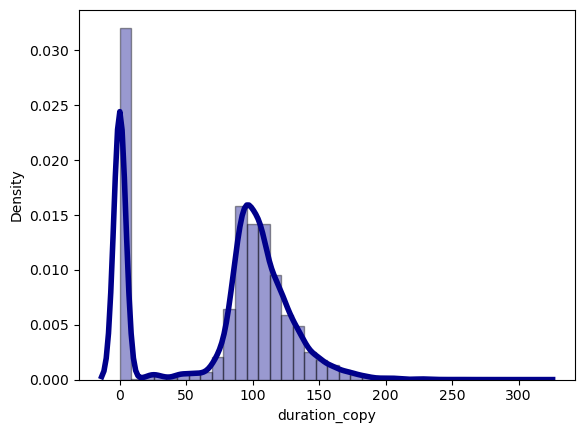

In [27]:
sns.distplot(df_final1['duration_copy'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [28]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration duration_copy  
0          2020  PG-13         90        80-100  
1          2021  TV-MA  2 Seasons            <1  
2          2021  TV-MA  2 Seasons            <1  
3          2021  TV-MA  2 Seasons            <1  
4          2021  TV-MA  2 Seasons            <1

In [29]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration  
0          2020  PG-13     80-100  
1          2021  TV-MA  2 Seasons  
2          2021  TV-MA  2 Seasons  
3          2021  TV-MA  2 Seasons  
4          2021  TV-MA  2 Seasons

In [30]:
df_final1['duration'].value_counts()

80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [31]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
 dt1=parse(i)
 arr.append(dt1.strftime('%Y-%m-%d'))
df_final1['Modified_Added_date'] =arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1['Modified_Added_date'].dt.month
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head()

C:\Users\gurud\AppData\Local\Temp\ipykernel_5984\121054959.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week


title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration Modified_Added_date  month_added  \
0          2020  PG-13     80-100          2021-09-25            9   
1          2021  TV-MA  2 Seasons          2021-09-24            9   
2          2021  TV-MA  2 Seasons          2021-09-24            9   
3          2021  TV-MA  2 Seasons          2021-09-24            9   
4          2021  TV-MA  2 Seasons          2021-09-24            9   

   week_Added  year  
0          38  2021  
1          38  2021  
2          38  2021  
3          38  2021  
4          38  2021

In [32]:
#Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it
#presence of brackets and content between brackets is removed.
df_final1['title']=df_final1['title'].str.replace(r"\(.*\)","")
df_final1.head()

C:\Users\gurud\AppData\Local\Temp\ipykernel_5984\371030481.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final1['title']=df_final1['title'].str.replace(r"\(.*\)","")


title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration Modified_Added_date  month_added  \
0          2020  PG-13     80-100          2021-09-25            9   
1          2021  TV-MA  2 Seasons          2021-09-24            9   
2          2021  TV-MA  2 Seasons          2021-09-24            9   
3          2021  TV-MA  2 Seasons          2021-09-24            9   
4          2021  TV-MA  2 Seasons          2021-09-24            9   

   week_Added  year  
0          38  2021  
1          38  2021  
2          38  2021  
3          38  2021  
4          38  2021

## Univariate Analysis in terms of counts of each column

In [33]:
#number of distinct titles on the basis of genre
df_final1.groupby(['Genre']).agg({"title":"nunique"}).sort_values(by=['title'], ascending=False)

title
Genre                              
International Movies           2738
Dramas                         2418
Comedies                       1673
International TV Shows         1351
Documentaries                   869
Action & Adventure              854
TV Dramas                       763
Independent Movies              756
Children & Family Movies        639
Romantic Movies                 615
TV Comedies                     581
Thrillers                       573
Crime TV Shows                  470
Kids' TV                        451
Docuseries                      395
Music & Musicals                372
Romantic TV Shows               370
Horror Movies                   353
Stand-Up Comedy                 343
Reality TV                      255
British TV Shows                253
Sci-Fi & Fantasy                243
Sports Movies                   219
Anime Series                    176
Spanish-Language TV Shows       174
TV Action & Adventure           168
Korean TV Shows                 151
Classic Movies                  116
LGBTQ Movies                    102
TV Mysteries                     98
Science & Nature TV              92
TV Sci-Fi & Fantasy              84
TV Horror                        75
Anime Features                   71
Cult Movies                      71
Teen TV Shows                    69
Faith & Spirituality             65
TV Thrillers                     57
Movies                           57
Stand-Up Comedy & Talk Shows     56
Classic & Cult TV                28
TV Shows                         16

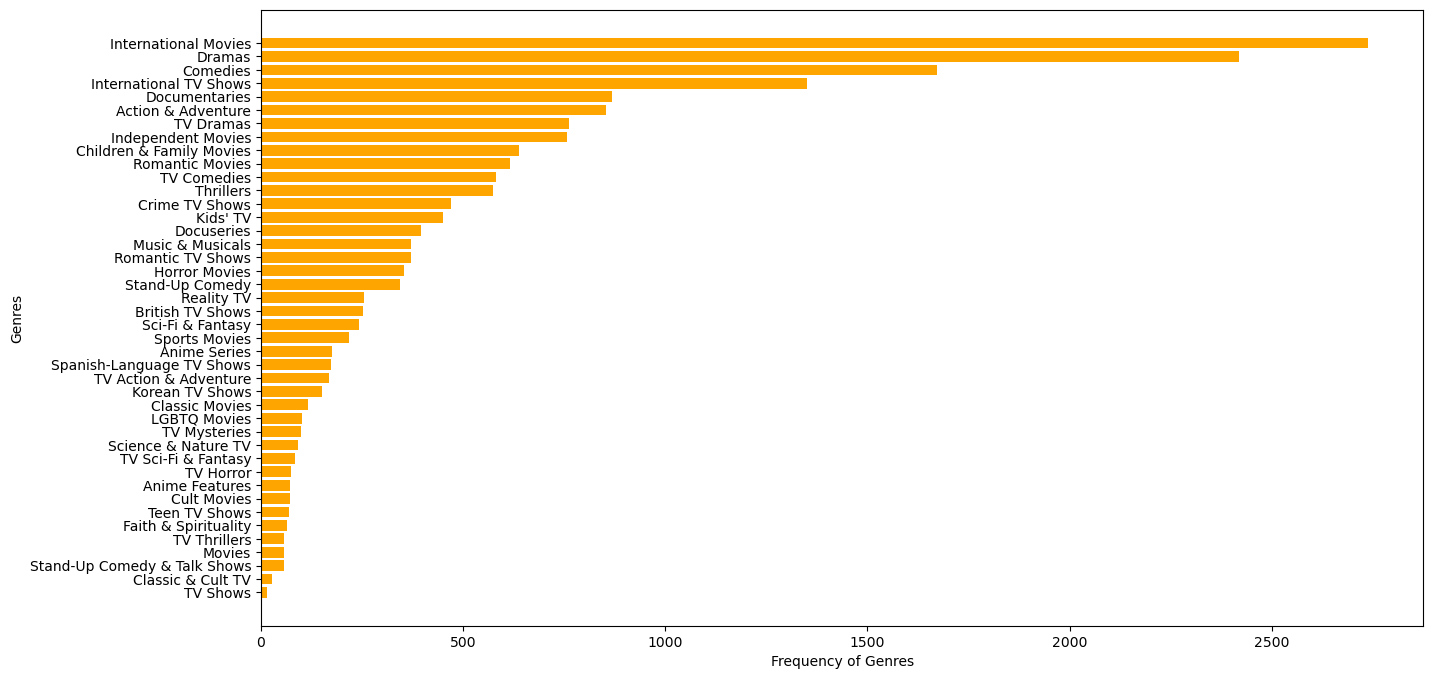

In [68]:
df_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'], ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas and Comedies are the most popular .

In [70]:
#number of distinct titles on the basis of type
df_final1.groupby(['type']).agg({"title":"nunique"})

title
type          
Movie     6115
TV Show   2676

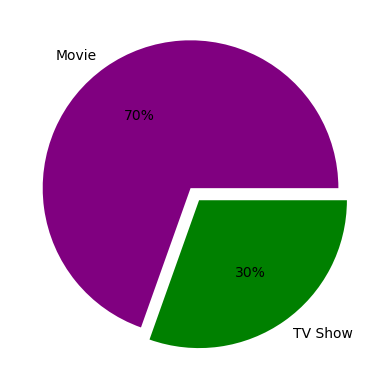

In [74]:
df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['purple','green'],autopct='%.lf%%')
plt.show()

We have 70:30 ratio of Movies and TV Shows in our data

In [76]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False)

title
country                    
United States          4245
India                  1126
United Kingdom          829
Canada                  460
France                  409
Japan                   338
Spain                   239
South Korea             235
Germany                 231
Unknown Country         175
Mexico                  175
China                   166
Australia               162
Nigeria                 140
Egypt                   134
Turkey                  115
Hong Kong               110
Brazil                  103
Italy                   102
Indonesia                97
Taiwan                   94
Belgium                  94
Argentina                94
Philippines              90
Thailand                 74
South Africa             65
Colombia                 54
Netherlands              50
Denmark                  50
Ireland                  46
Sweden                   44
Singapore                41
Poland                   41
United Arab Emirates     38
New Zealand              33
Lebanon                  33
Chile                    30
Israel                   30
Norway                   30
Russia                   27
Malaysia                 26
Pakistan                 24
Czech Republic           23
Switzerland              19
Saudi Arabia             14
Romania                  14
Uruguay                  14
Luxembourg               12
Finland                  12
Austria                  12
Greece                   11
Peru                     11
Iceland                  11
Hungary                  11
Qatar                    10
Jordan                   10
Bulgaria                 10
Kuwait                    9
Ghana                     8
Vietnam                   7
Serbia                    7
Morocco                   6
Portugal                  6
Kenya                     6
Cambodia                  5
West Germany              5
Iran                      4
Bangladesh                4
Croatia                   4
Venezuela                 4
Senegal                   3
Ukraine                   3
Soviet Union              3
Slovenia                  3
Syria                     3
                          3
Zimbabwe                  3
Algeria                   3
Mauritius                 3
Malta                     3
Iraq                      2
Angola                    2
United Kingdom,           2
Cameroon                  2
Cayman Islands            2
Cuba                      2
Namibia                   2
Georgia                   2
Guatemala                 2
Nepal                     2
Puerto Rico               1
Montenegro                1
Mongolia                  1
Cambodia,                 1
Burkina Faso              1
Uganda                    1
Botswana                  1
Bermuda                   1
Belarus                   1
Bahamas                   1
Lithuania                 1
United States,            1
Azerbaijan                1
Armenia                   1
Vatican City              1
Mozambique                1
Nicaragua                 1
Albania                   1
Palestine                 1
Panama                    1
Cyprus                    1
Sudan                     1
Liechtenstein             1
Latvia                    1
Samoa                     1
Kazakhstan                1
Jamaica                   1
Afghanistan               1
Poland,                   1
Slovakia                  1
Malawi                    1
Somalia                   1
Paraguay                  1
Ecuador                   1
East Germany              1
Dominican Republic        1
Sri Lanka                 1
Ethiopia                  1

The above dataframe shows a flaw in which we are seeing countries, such as Cambodia and Cambodia, or
United States and United States, are shown as different countries.They should have been same

In [77]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
df_final1.head()

title         Actors         Directors  \
0  Dick Johnson Is Dead  Unknown Actor   Kirsten Johnson   
1         Blood & Water     Ama Qamata  Unknown Director   
2         Blood & Water     Ama Qamata  Unknown Director   
3         Blood & Water     Ama Qamata  Unknown Director   
4         Blood & Water    Khosi Ngema  Unknown Director   

                    Genre        country show_id     type          date_added  \
0           Documentaries  United States      s1    Movie  September 25, 2021   
1  International TV Shows   South Africa      s2  TV Show  September 24, 2021   
2               TV Dramas   South Africa      s2  TV Show  September 24, 2021   
3            TV Mysteries   South Africa      s2  TV Show  September 24, 2021   
4  International TV Shows   South Africa      s2  TV Show  September 24, 2021   

   release_year rating   duration Modified_Added_date  month_added  \
0          2020  PG-13     80-100          2021-09-25            9   
1          2021  TV-MA  2 Seasons          2021-09-24            9   
2          2021  TV-MA  2 Seasons          2021-09-24            9   
3          2021  TV-MA  2 Seasons          2021-09-24            9   
4          2021  TV-MA  2 Seasons          2021-09-24            9   

   week_Added  year  
0          38  2021  
1          38  2021  
2          38  2021  
3          38  2021  
4          38  2021

In [78]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

title
country                    
                          3
Afghanistan               1
Albania                   1
Algeria                   3
Angola                    2
Argentina                94
Armenia                   1
Australia               162
Austria                  12
Azerbaijan                1
Bahamas                   1
Bangladesh                4
Belarus                   1
Belgium                  94
Bermuda                   1
Botswana                  1
Brazil                  103
Bulgaria                 10
Burkina Faso              1
Cambodia                  6
Cameroon                  2
Canada                  460
Cayman Islands            2
Chile                    30
China                   166
Colombia                 54
Croatia                   4
Cuba                      2
Cyprus                    1
Czech Republic           23
Denmark                  50
Dominican Republic        1
East Germany              1
Ecuador                   1
Egypt                   134
Ethiopia                  1
Finland                  12
France                  409
Georgia                   2
Germany                 231
Ghana                     8
Greece                   11
Guatemala                 2
Hong Kong               110
Hungary                  11
Iceland                  11
India                  1126
Indonesia                97
Iran                      4
Iraq                      2
Ireland                  46
Israel                   30
Italy                   102
Jamaica                   1
Japan                   338
Jordan                   10
Kazakhstan                1
Kenya                     6
Kuwait                    9
Latvia                    1
Lebanon                  33
Liechtenstein             1
Lithuania                 1
Luxembourg               12
Malawi                    1
Malaysia                 26
Malta                     3
Mauritius                 3
Mexico                  175
Mongolia                  1
Montenegro                1
Morocco                   6
Mozambique                1
Namibia                   2
Nepal                     2
Netherlands              50
New Zealand              33
Nicaragua                 1
Nigeria                 140
Norway                   30
Pakistan                 24
Palestine                 1
Panama                    1
Paraguay                  1
Peru                     11
Philippines              90
Poland                   42
Portugal                  6
Puerto Rico               1
Qatar                    10
Romania                  14
Russia                   27
Samoa                     1
Saudi Arabia             14
Senegal                   3
Serbia                    7
Singapore                41
Slovakia                  1
Slovenia                  3
Somalia                   1
South Africa             65
South Korea             235
Soviet Union              3
Spain                   239
Sri Lanka                 1
Sudan                     1
Sweden                   44
Switzerland              19
Syria                     3
Taiwan                   94
Thailand                 74
Turkey                  115
Uganda                    1
Ukraine                   3
United Arab Emirates     38
United Kingdom          831
United States          4246
Unknown Country         175
Uruguay                  14
Vatican City              1
Venezuela                 4
Vietnam                   7
West Germany              5
Zimbabwe                  3

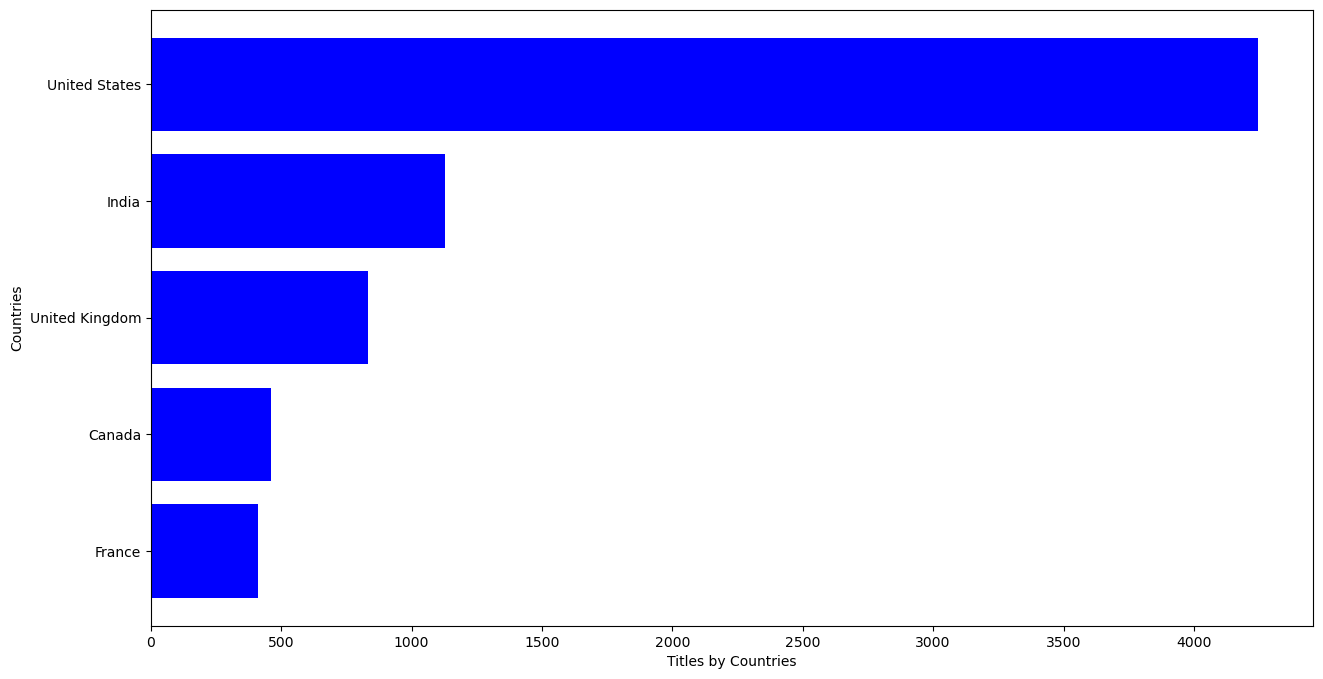

In [82]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

In [83]:
df_country[::-1]

country  title
37           France    409
21           Canada    460
115  United Kingdom    831
46            India   1126
116   United States   4246

US,India,UK,Canada and France are leading countries in Content Creation on Netflix

In [86]:
#number of distinct titles on the basis of rating
df_final1.groupby(['rating']).agg({"title":"nunique"})

title
rating         
G            41
NC-17         3
NR           87
PG          287
PG-13       490
R           799
TV-14      2151
TV-G        220
TV-MA      3204
TV-PG       863
TV-Y        305
TV-Y7       334
TV-Y7-FV      6
UR            3

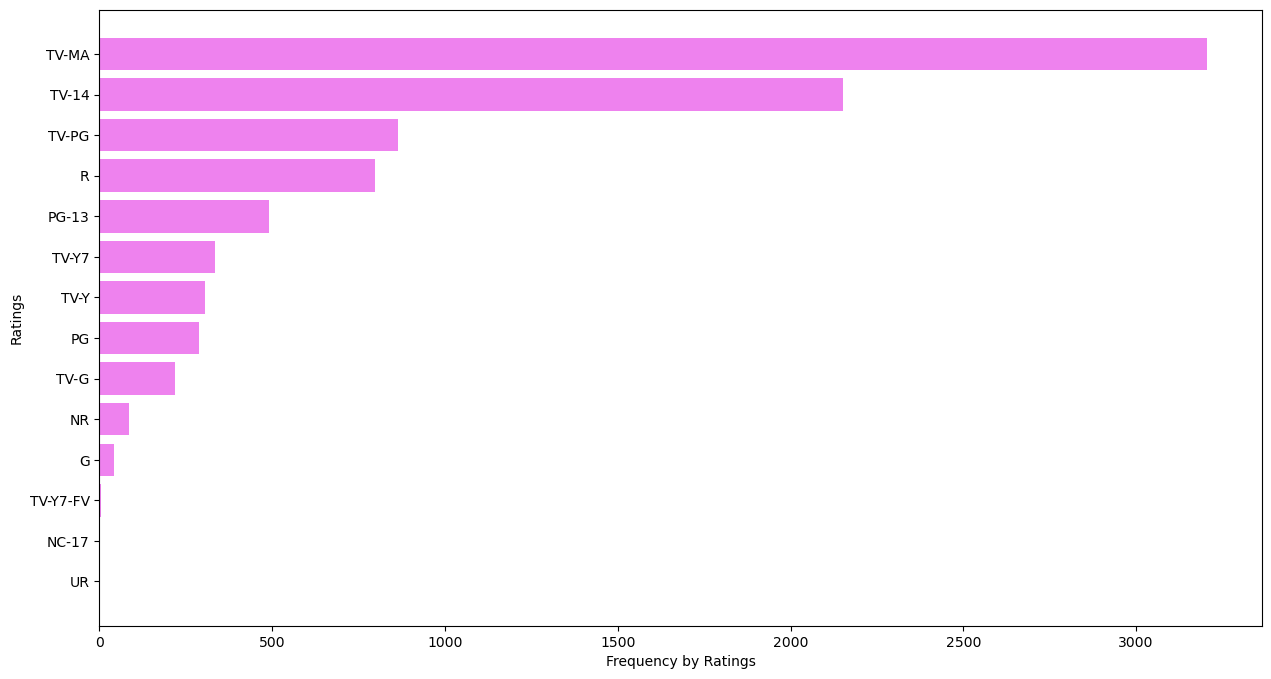

In [97]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for
audience under 14 and those which require Parental Guidance


In [99]:
#number of distinct titles on the basis of duration
df_final1.groupby(['duration']).agg({"title":"nunique"})

title
duration         
1 Season     1793
1-50          287
10 Seasons      7
100-120      1671
11 Seasons      2
12 Seasons      2
120-150       891
13 Seasons      3
15 Seasons      2
150-200       222
17 Seasons      1
2 Seasons     425
200-315        19
3 Seasons     199
4 Seasons      95
5 Seasons      65
50-80         808
6 Seasons      33
7 Seasons      23
8 Seasons      17
80-100       2220
9 Seasons       9

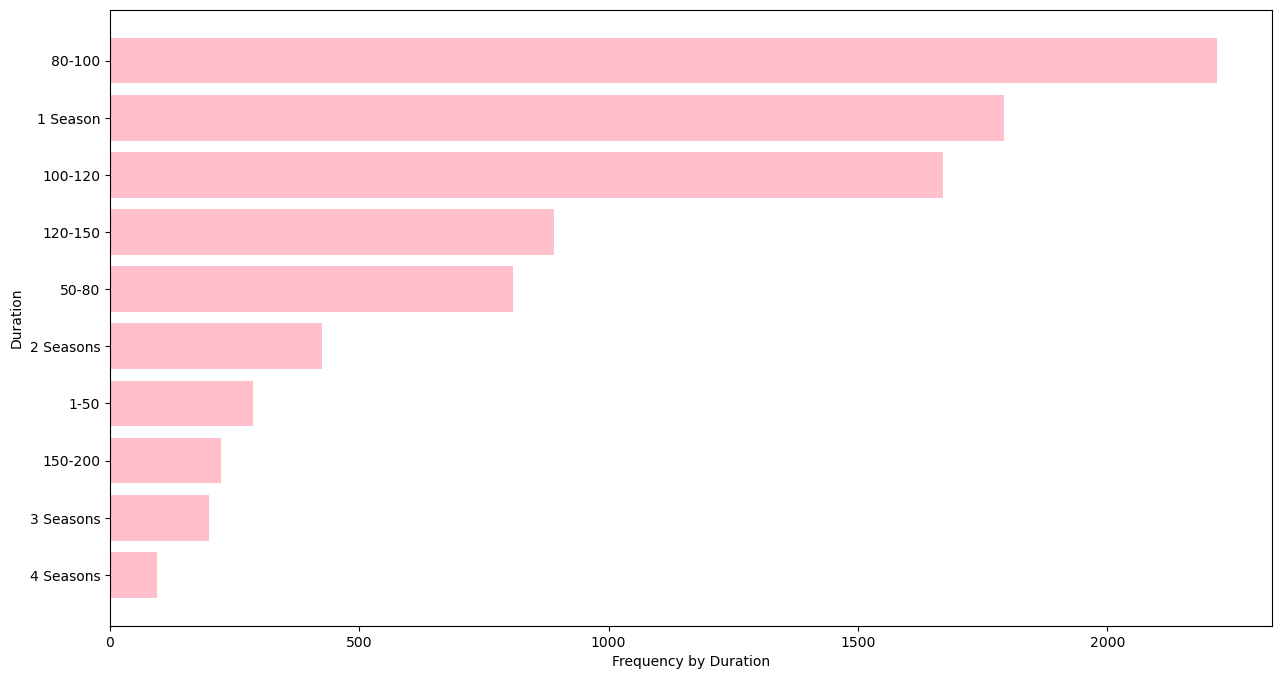

In [101]:
df_duration=df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

The duration of Most Watched content in our whole data is 80-100 mins.These must be movies and Shows
having only 1 Season.

In [102]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['Actors']).agg({"title":"nunique"})

title
Actors                                                   
 Jr.                                                    2
"Riley" Lakdhar Dridi                                   1
'Najite Dede                                            2
2 Chainz                                                1
2Mex                                                    1
4Minute                                                 1
50 Cent                                                 5
9m88                                                    1
A Boogie Wit tha Hoodie                                 1
A. Murat Özgen                                          1
A.C. Peterson                                           1
A.D. Miles                                              3
A.J. Cook                                               2
A.J. Johnson                                            1
A.J. LoCascio                                           3
A.K. Hangal                                             4
A.R. Rahman                                             1
A.S. Sasi Kumar                                         1
AC Lim                                                  1
AFRA                                                    1
AJ Bowen                                                1
AJ Michalka                                             1
AJ Rivera                                               1
ARAH                                                    2
Aabhas Yadav                                            1
Aachal Munjal                                           1
Aadarsh Balakrishna                                     2
Aadhi                                                   1
Aadhya Anand                                            1
Aadil Khan                                              1
Aaditi Pohankar                                         2
Aaditya Pratap Singh                                    1
Aadukalam Naren                                         1
Aadya Bedi                                              1
Aahana Kumra                                            2
Aakarshan Singh                                         1
Aakash Dabhade                                          4
Aakash Dahiya                                           1
Aakash Pandey                                           1
Aakshath Das                                            1
Aamina Sheikh                                           1
Aamir Ahmed                                             1
Aamir Bashir                                            5
Aamir Khan                                             16
Aamir Qureshi                                           1
Aanand Kale                                             1
Aanchal Munjal                                          1
Aarav Khanna                                            1
Aarif Rahman                                            1
Aarjav Trivedi                                          1
Aarna Sharma                                            1
Aarohi Patel                                            1
Aaron Abrams                                            4
Aaron Altaras                                           1
Aaron Ashmore                                           1
Aaron Blakely                                           1
Aaron Burns                                             2
Aaron Carpenter                                         1
Aaron Chen                                              1
Aaron Chow                                              1
Aaron D. Spears                                         1
Aaron Dismuke                                           1
Aaron Douglas                                           3
Aaron Eckhart                                           7
Aaron Eisenberg                                         1
Aaron Farb                                              1
Aaron Glenane                                           1
Aaron Guy                                         

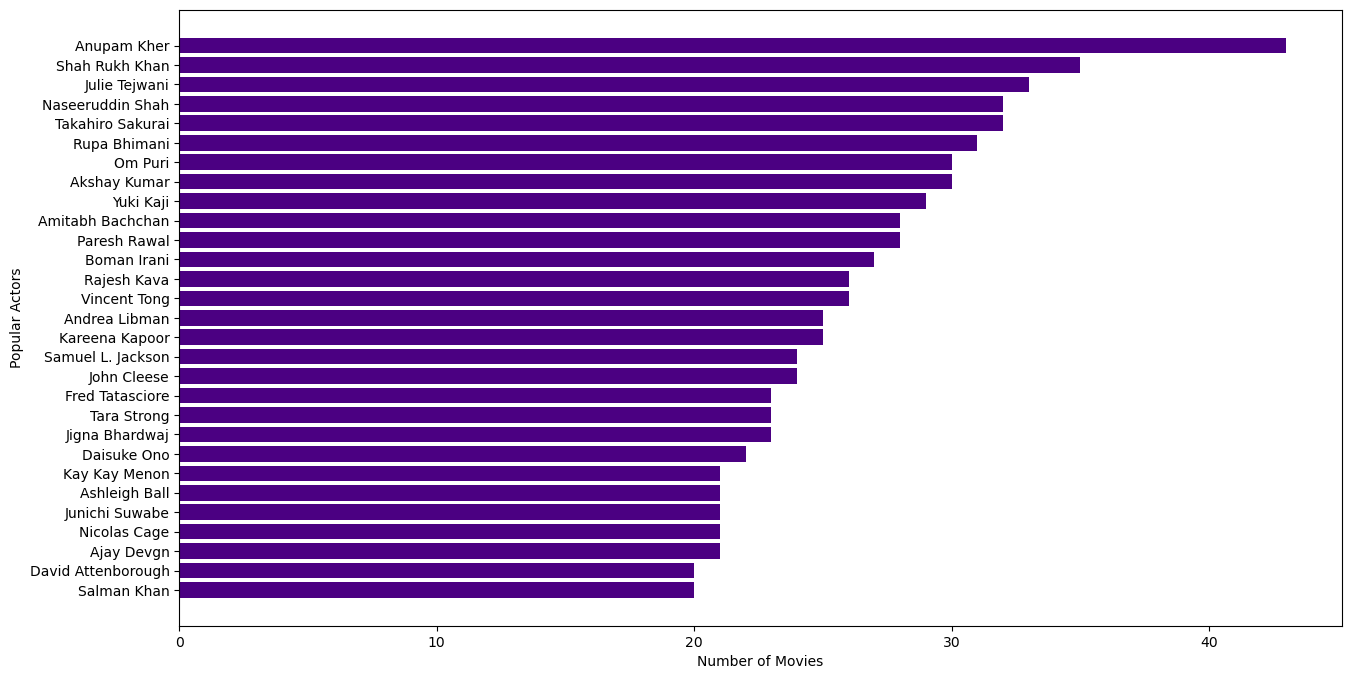

In [108]:
df_actors=df_final1.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most
Watched content.

In [109]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['Directors']).agg({"title":"nunique"})

title
Directors                              
A. L. Vijay                           2
A. Raajdheep                          1
A. Salaam                             1
A.R. Murugadoss                       2
Aadish Keluskar                       1
Aamir Bashir                          1
Aamir Khan                            1
Aanand Rai                            1
Aaron Burns                           1
Aaron Hancox                          1
Aaron Hann                            1
Aaron Lieber                          1
Aaron Moorhead                        2
Aaron Nee                             1
Aaron Sorkin                          2
Aaron Woodley                         1
Aaron Woolf                           1
Aatmaram Dharne                       1
Abba T. Makama                        2
Abbas Alibhai Burmawalla              5
Abbas Mustan                          1
Abbas Tyrewala                        1
Abby Epstein                          1
Abdellatif Kechiche                   1
Abdul Aziz Hashad                     1
Abdulaziz Alshlahei                   1
Abdullah Al Noor                      1
Abel Ferrara                          1
Abhay Chopra                          1
Abhijeet Deshpande                    1
Abhijit Kokate                        1
Abhijit Panse                         1
Abhinav Shiv Tiwari                   1
Abhinay Deo                           3
Abhishek Chaubey                      5
Abhishek Kapoor                       3
Abhishek Saxena                       1
Abhishek Sharma                       3
Abhishek Varman                       1
Abir Sengupta                         1
Abosi Ogba                            1
Abu Bakr Shawky                       1
Achille Brice                         1
Aco Tenriyagelli                      1
Adam Alleca                           1
Adam B. Stein                         1
Adam Bhala Lough                      1
Adam Bolt                             1
Adam Carolla                          3
Adam Collins                          1
Adam Darke                            1
Adam Davis                            1
Adam Del Giudice                      1
Adam Deyoe                            1
Adam Dubin                            1
Adam Egypt Mortimer                   1
Adam Larson Broder                    1
Adam Leon                             1
Adam MacDonald                        1
Adam Marino                           1
Adam McKay                            3
Adam Nee                              1
Adam Nimoy                            1
Adam Randall                          1
Adam Salky                            1
Adam Schlesinger                      1
Adam Shankman                         3
Adam Sjöberg                          1
Adam Smith                            1
Adam Wingard                          1
Adam Wood                             1
Adarsh Eshwarappa                     1
Adekunle Nodash Adejuyigbe            1
Adele K. Thomas                       1
Adirek Wattaleela                     1
Adisorn Tresirikasem                  1
Aditya Kripalani                      2
Aditya Sarpotdar                      2
Aditya Vikram Sengupta                1
Adrian Murray                         1
Adrian Teh                            3
Adriana Trigiani                      1
Adriano Rudiman                       3
Adrien Lagier                         1
Adrián García Bogliano                1
Advait Chandan                        1
Adze Ugah                             3
Afia Nathaniel                        1
Afonso Poyart                         1
Agasyah Karim                         1
Agnidev Chatterjee                    1
Agustí Villaronga                     1
Ah Loong                              1
Ahishor Solomon                       2
Ahmad El-Badri                        4
Ahmad Samir Farag                     1
Ahmed Al-Badry                        3
Ahmed El Gendy                        1
Ahmed Medhat                      

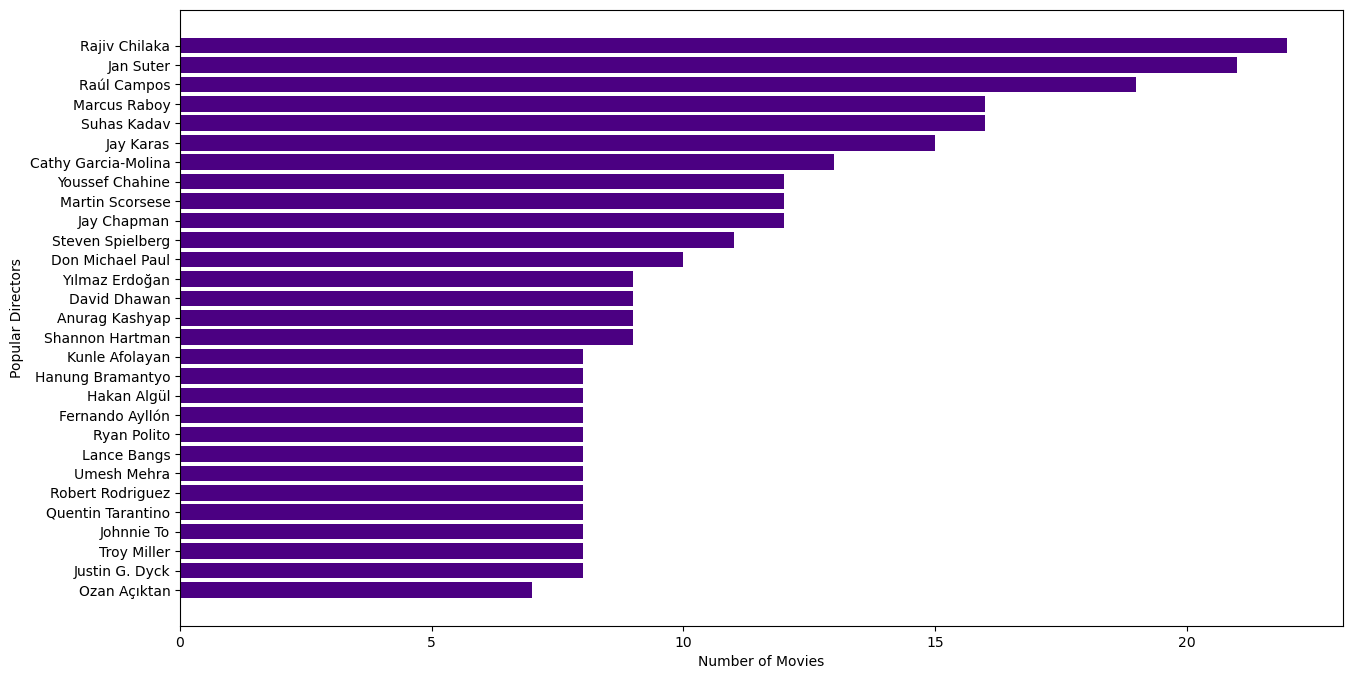

In [112]:
df_directors=df_final1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

In [113]:
#number of distinct titles on the basis of year
df_final1.groupby(['year']).agg({"title":"nunique"})

title
year       
2008      2
2009      2
2010      1
2011     13
2012      3
2013     11
2014     24
2015     82
2016    432
2017   1185
2018   1650
2019   2012
2020   1877
2021   1498

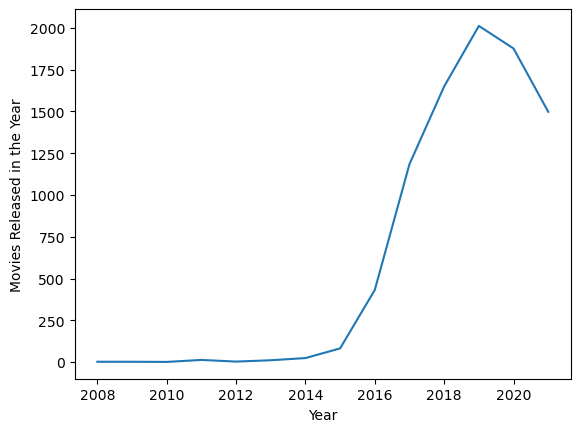

In [114]:
df_year=df_final1.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing
from here(probably due to Covid)

In [115]:
#number of distinct titles on the basis of week
df_final1.groupby(['week_Added']).agg({"title":"nunique"})

title
week_Added       
1             372
2             108
3             113
4              88
5             208
6              97
7             147
8             110
9             254
10            135
11            163
12            109
13            250
14            173
15            153
16            160
17            154
18            234
19            116
20            130
21            117
22            206
23            151
24            164
25            143
26            269
27            241
28            131
29            140
30            160
31            269
32            118
33            153
34            139
35            265
36            142
37            183
38            139
39            165
40            287
41            116
42            133
43            116
44            318
45             98
46            134
47            120
48            200
49            140
50            189
51            137
52            132
53            104

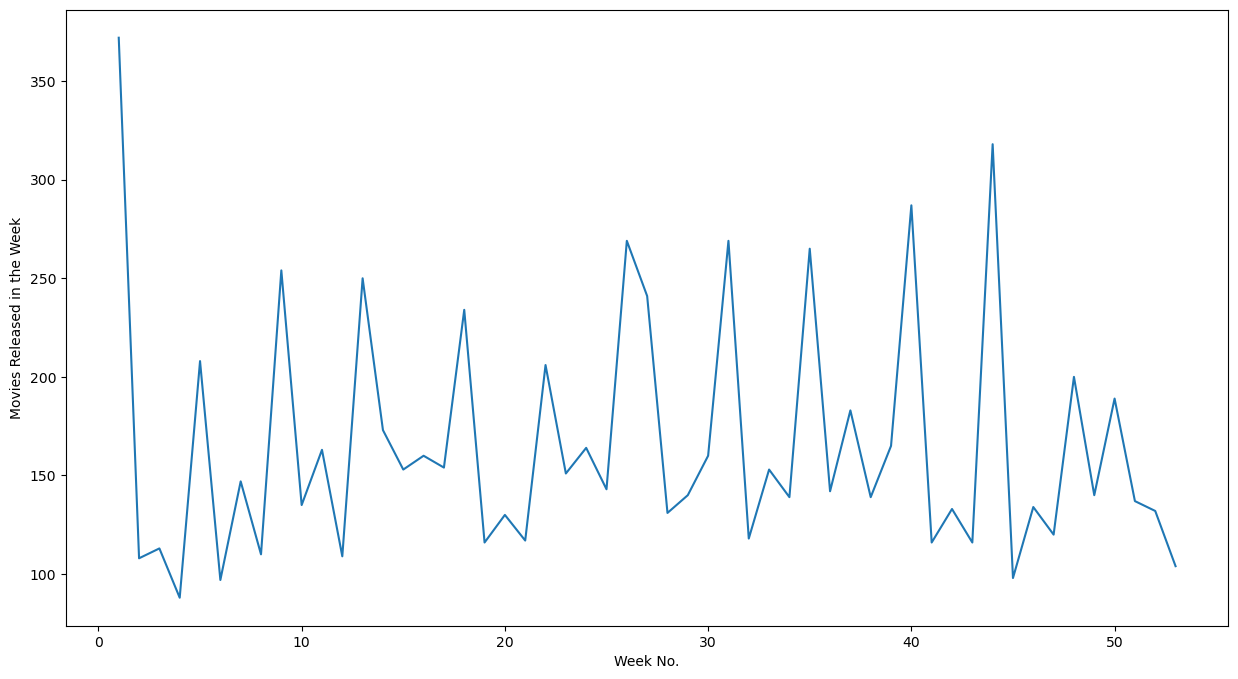

In [116]:
df_week=df_final1.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern

In [117]:
#number of distinct titles on the basis of week
df_final1.groupby(['month_added']).agg({"title":"nunique"})

title
month_added       
1              738
2              563
3              742
4              765
5              631
6              726
7              832
8              748
9              771
10             758
11             706
12             813

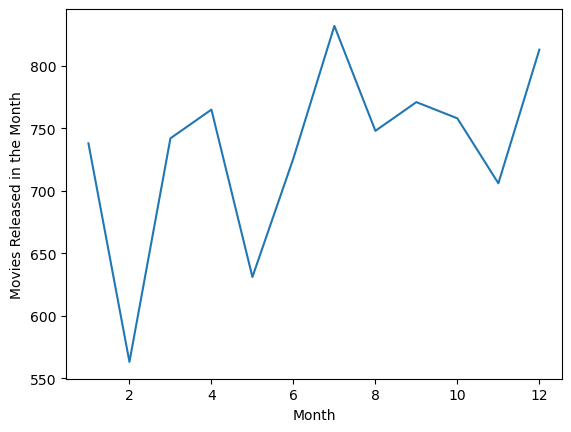

In [118]:
df_month=df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

Most of the content is added in the first and last months across Netflix(reinstating what we observed for first
week in above plot )

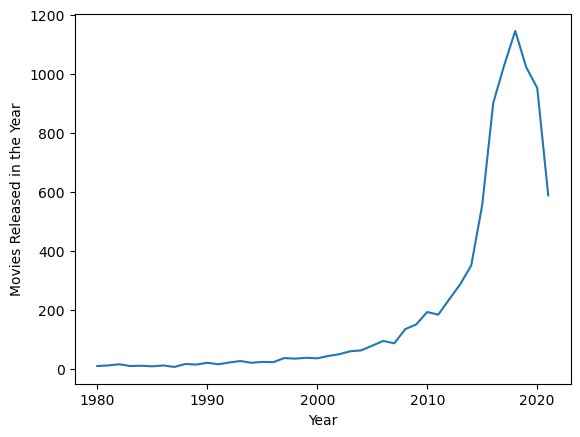

In [125]:
df_release_year=df_final1[df_final1['release_year']>=1980].groupby(['release_year']).agg({'title':'nunique'})
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

Net content release which are later uploaded to Netflix has increased since 1980 till 2020 though later reduced
certainly due to COVID-19

## Univariate Analysis separately for shows and movies

In [126]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']

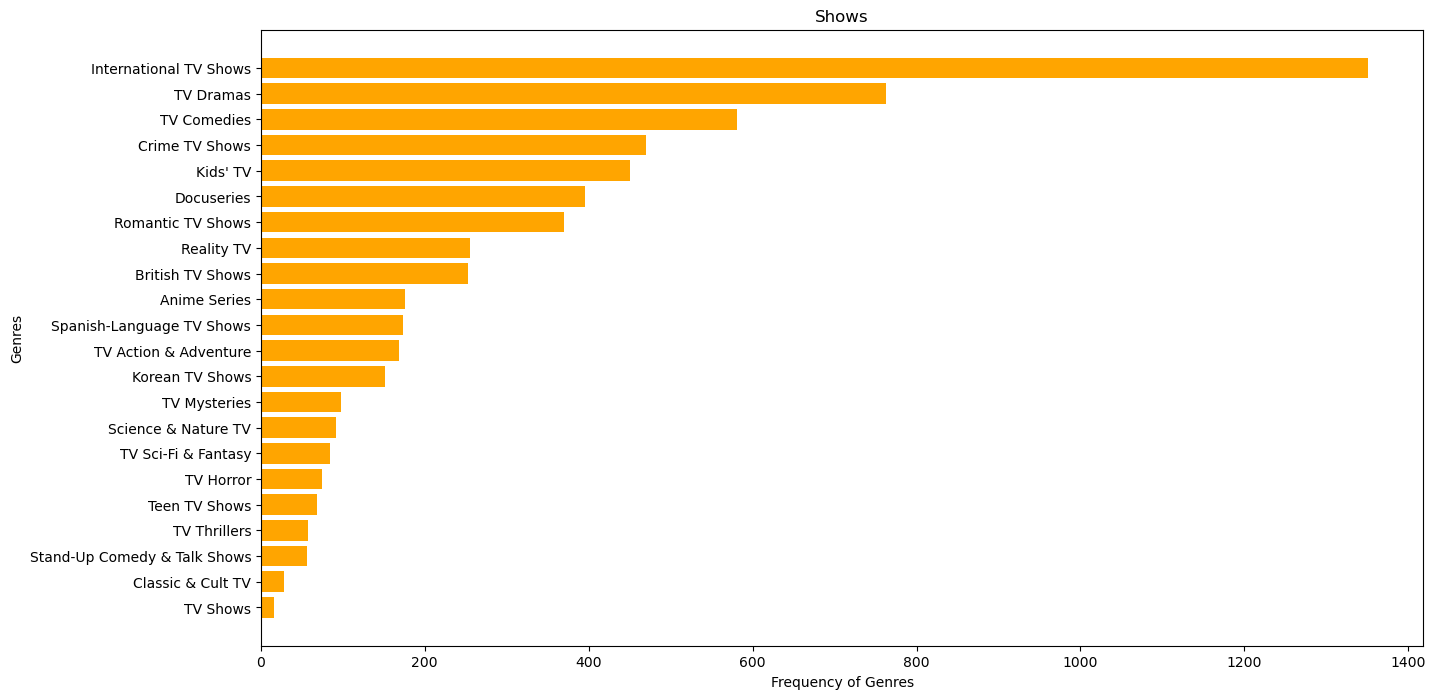

In [138]:
df_genre=df_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.title("Shows")
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

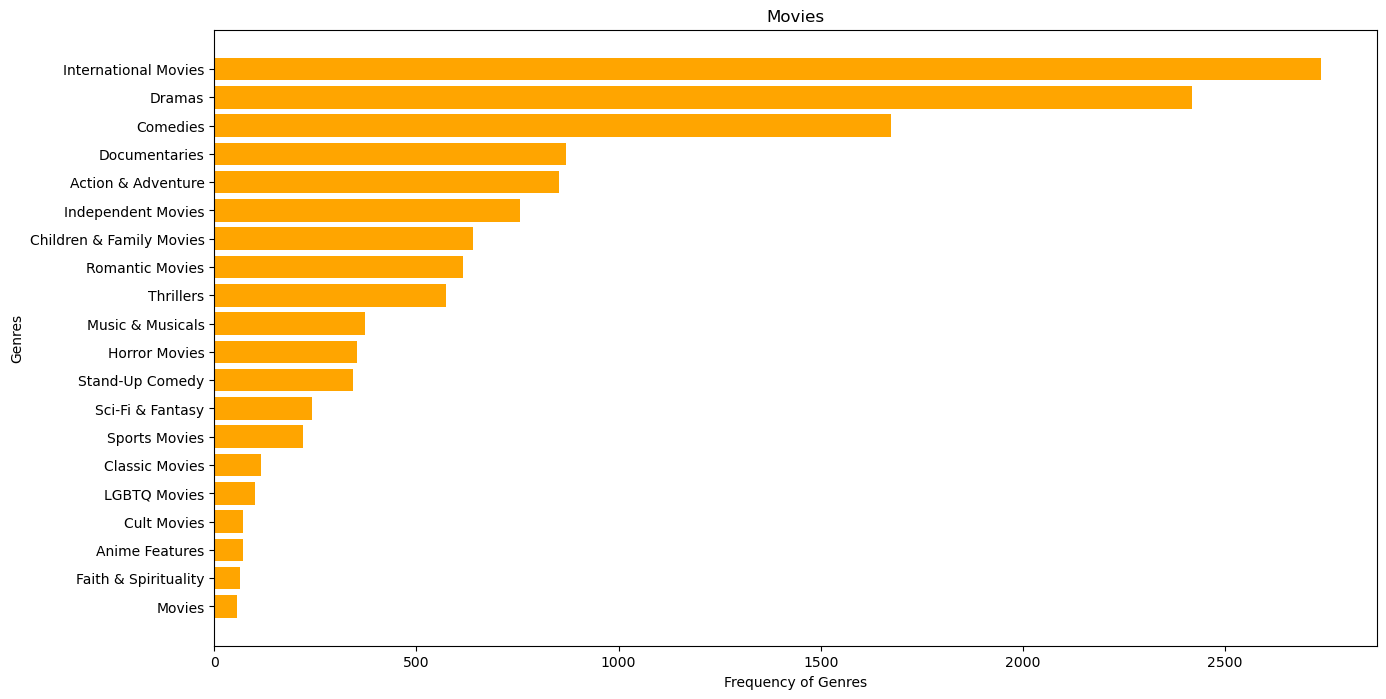

In [139]:
df_genre=df_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.title("Movies")
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on
Netflix

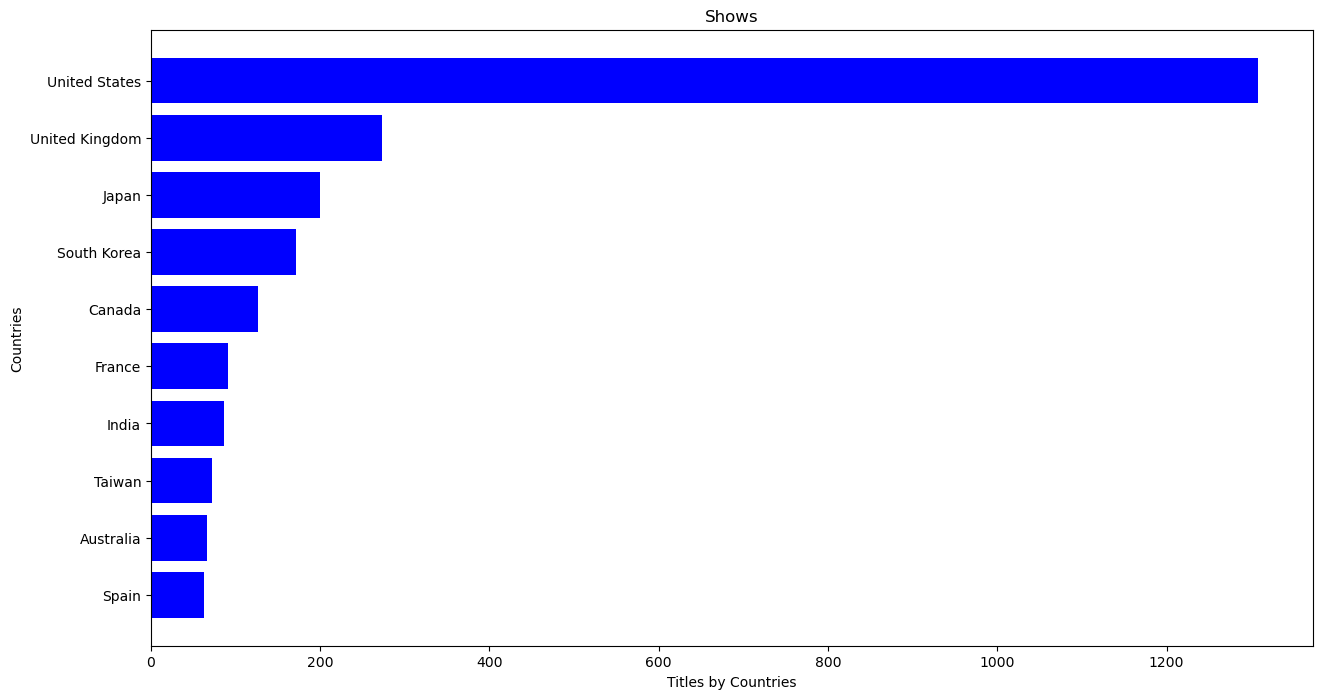

In [136]:
df_country=df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.title("Shows")
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

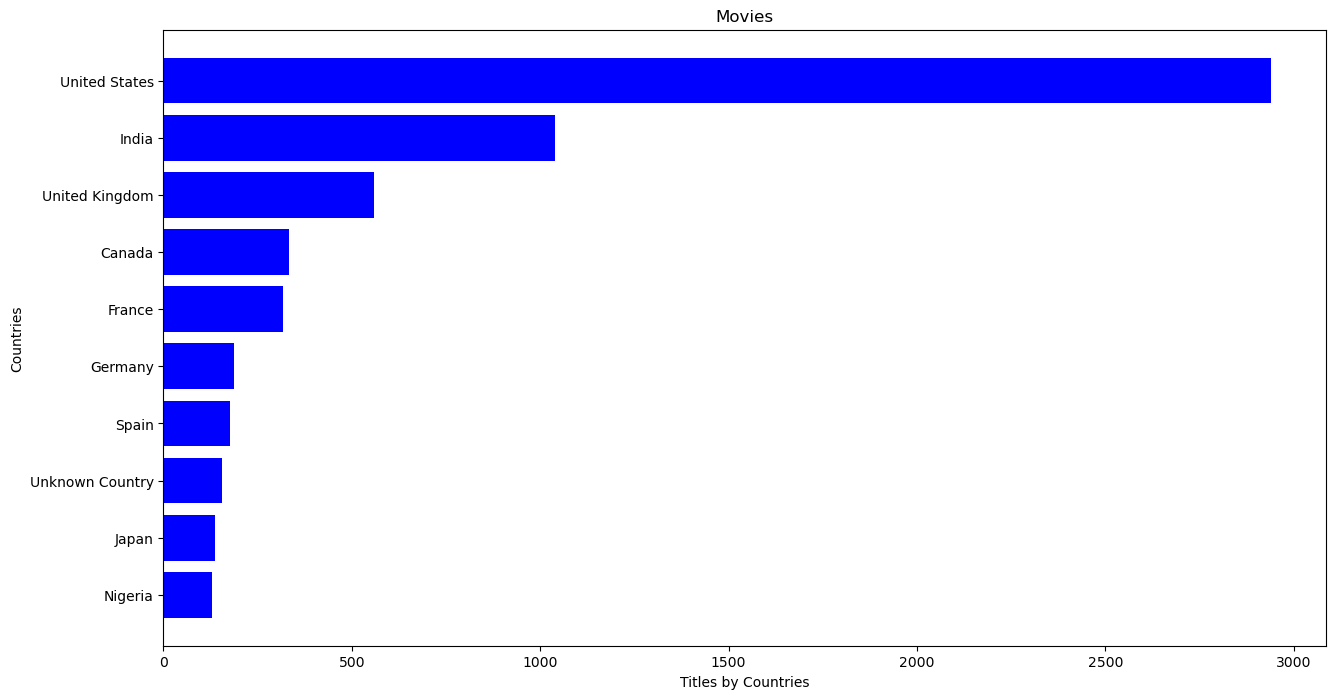

In [137]:
df_country=df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.title("Movies")
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows
and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.

Moreover the number of Movies created in India outweight the sum of TV Shows and Movies across UK since
India was rated as second in net sum of whole content across Netflix.

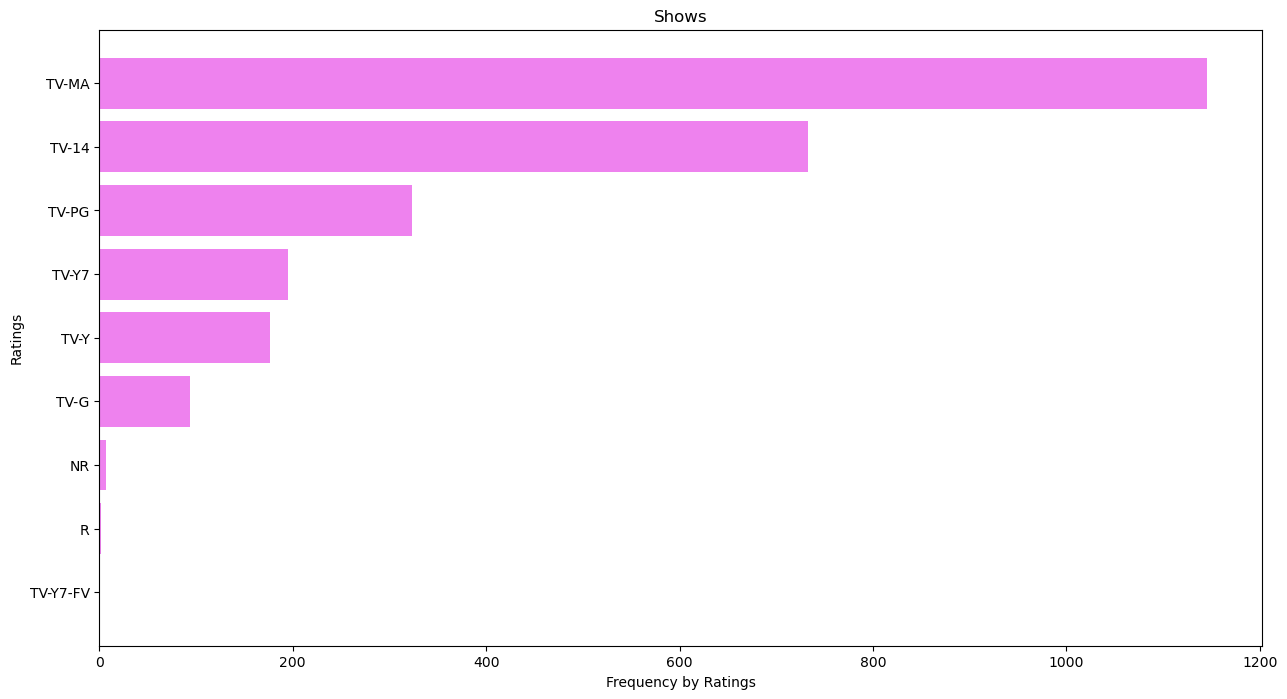

In [141]:
df_rating=df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.title("Shows")
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

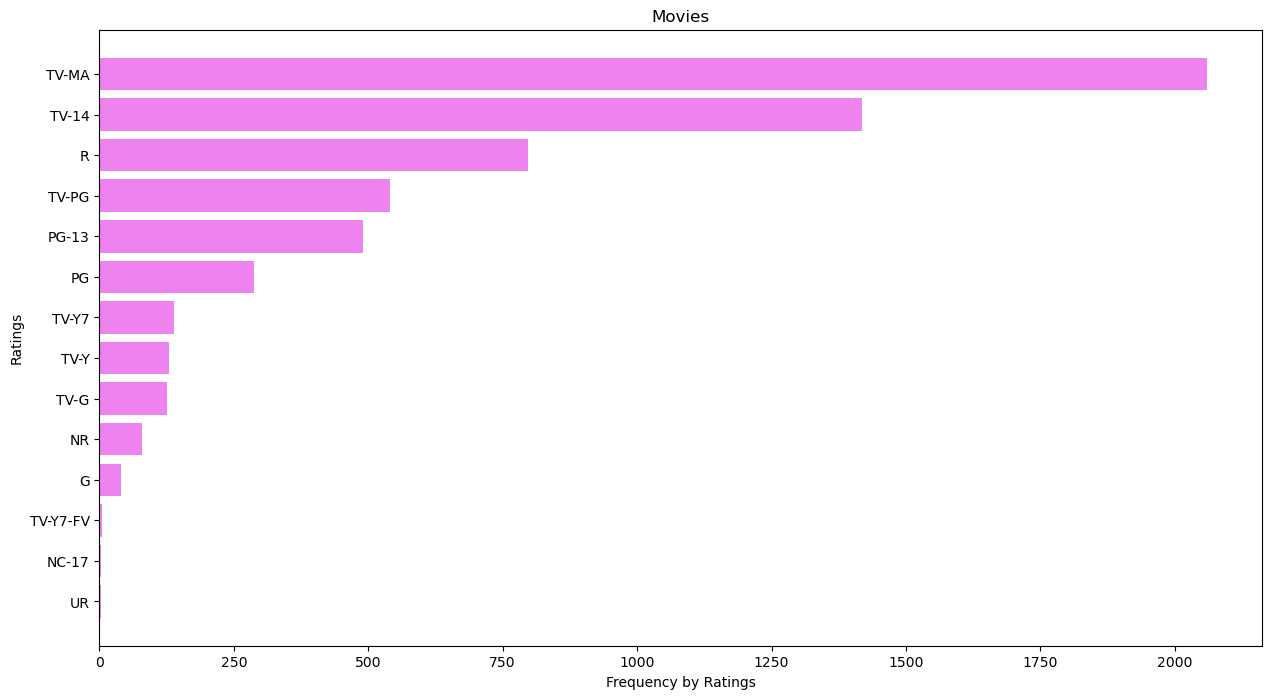

In [142]:
df_rating=df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.title("Movies")
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.
Moreover there are no TV Shows having a rating of R

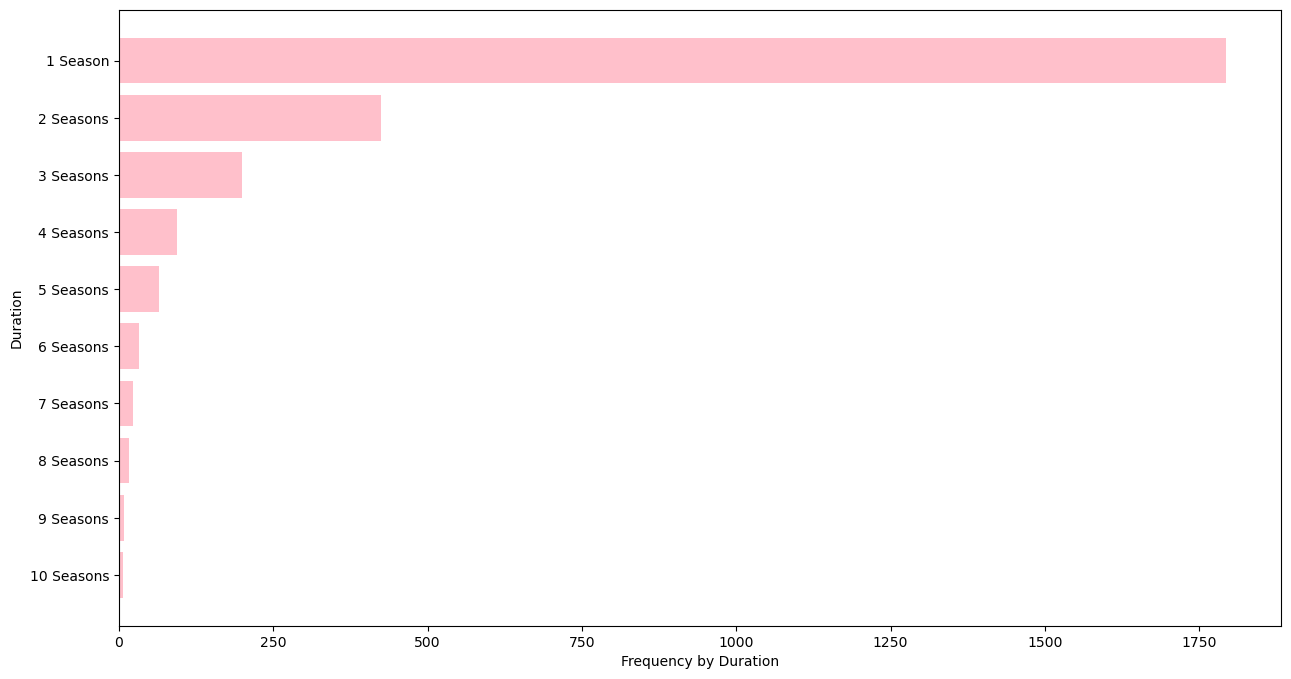

In [144]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across TV Shows, shows having only 1 Season are common as soon as the season length increases, the
number of shows decrease and this definitely sounds as expected

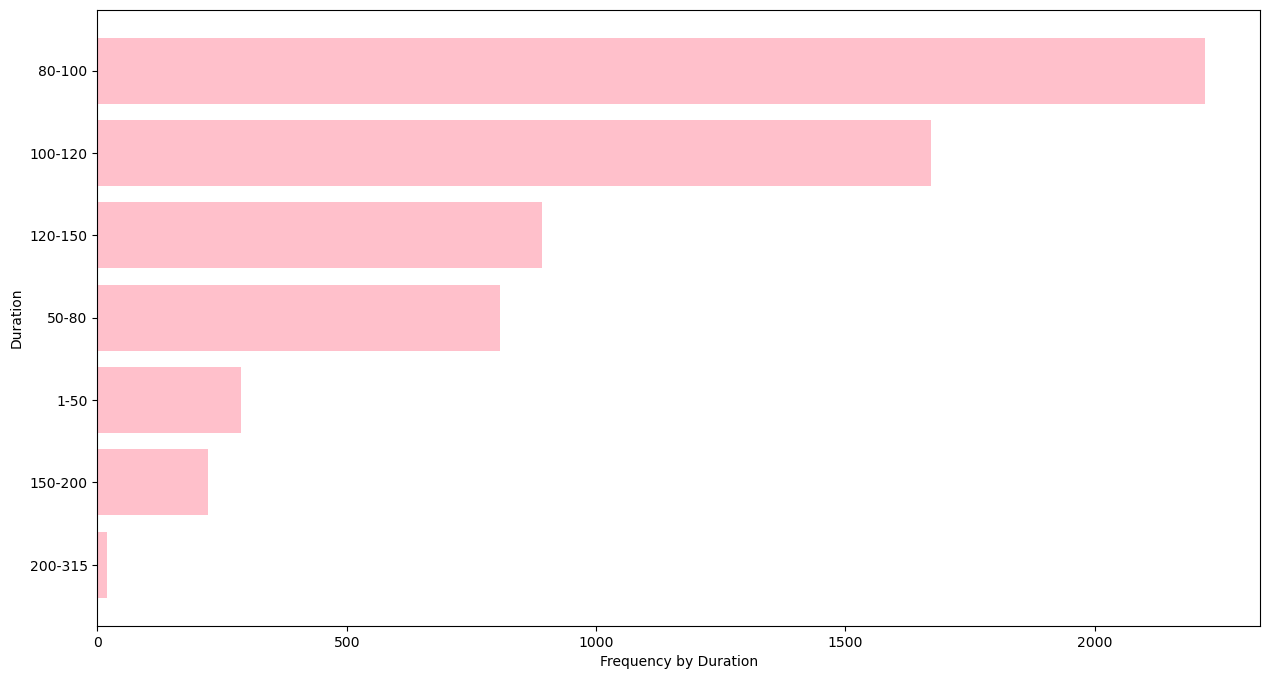

In [146]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite
possibly 80-150 mins is the sweet spot we would be wanting for movies.

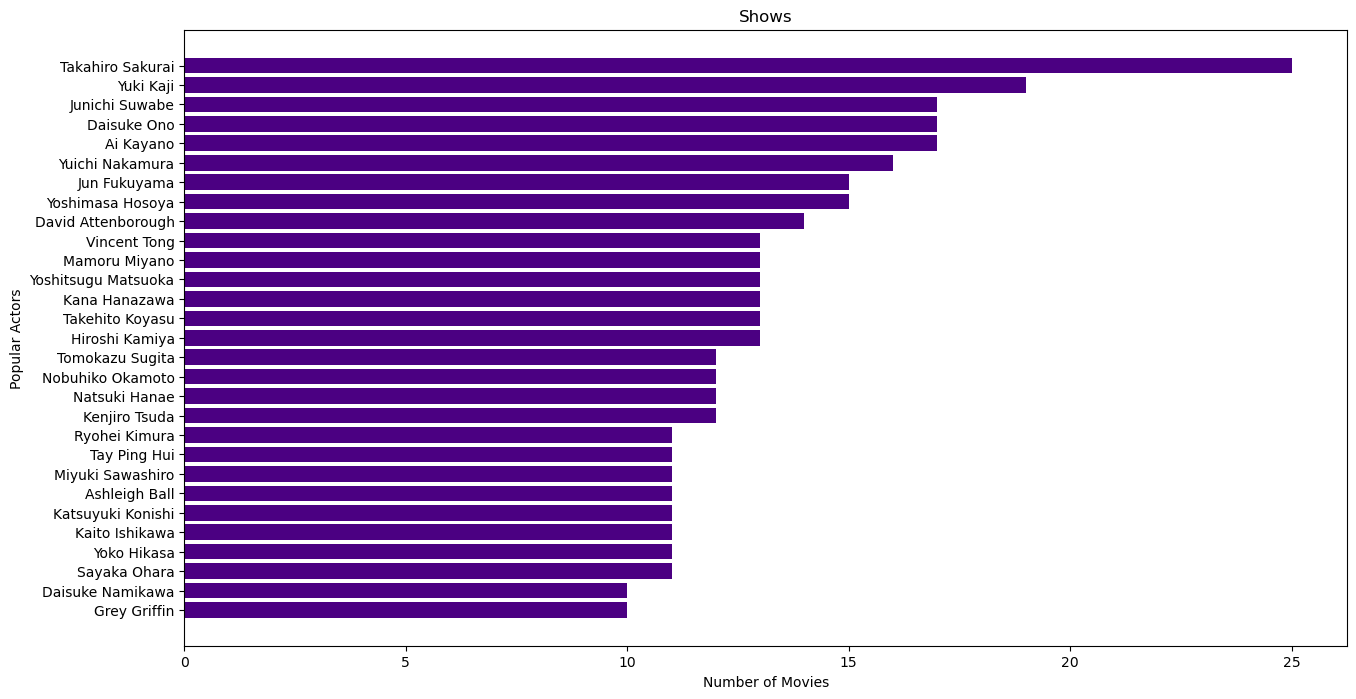

In [150]:
df_actors=df_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.title("Shows")
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Takahiro Sakurai,Yuki Kaji and other South Korean/Japanese actors are the most popular actors across TV
Shows

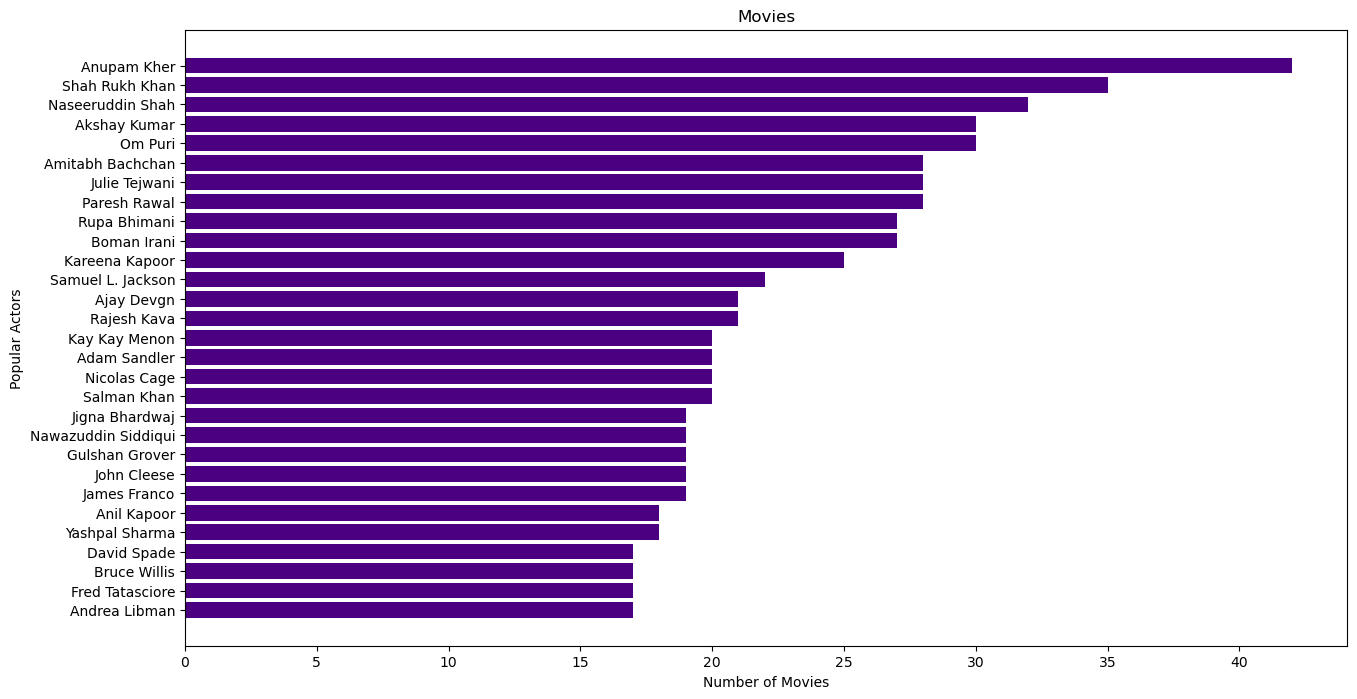

In [153]:
df_actors=df_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.title("Movies")
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on
Netflix

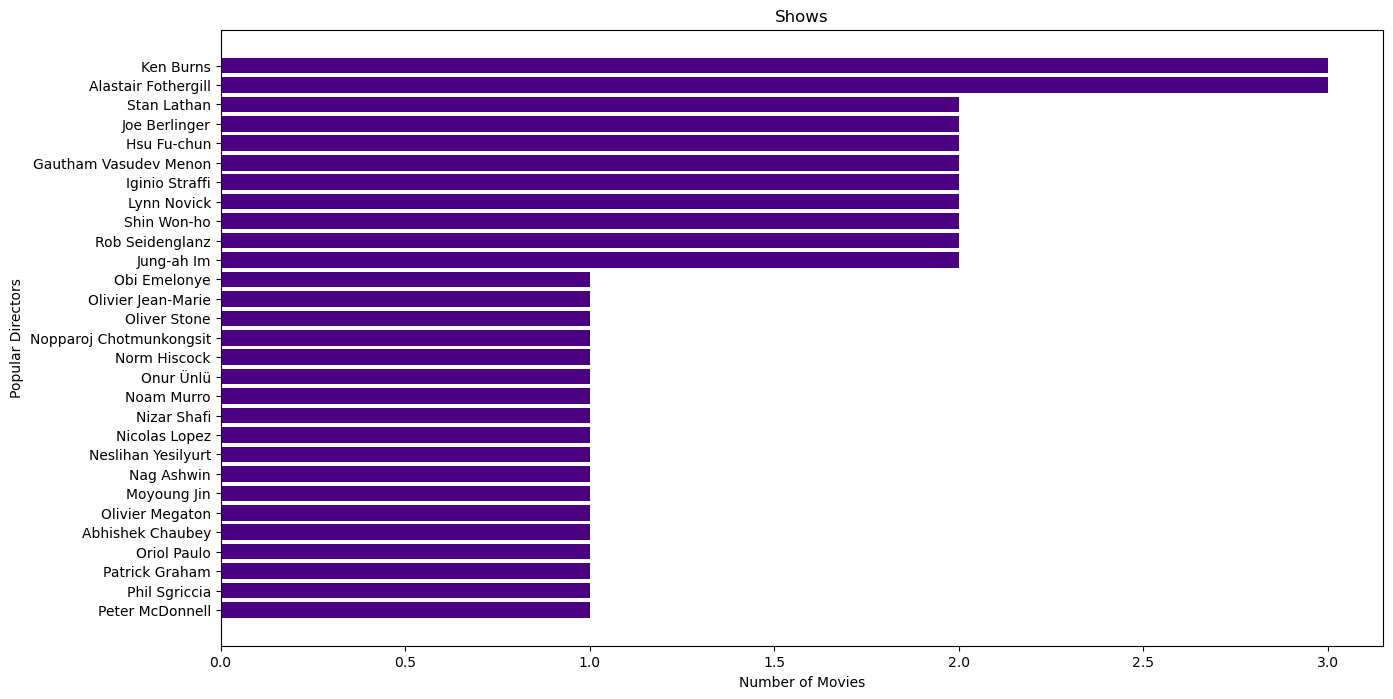

In [152]:
df_directors=df_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.title("Shows")
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

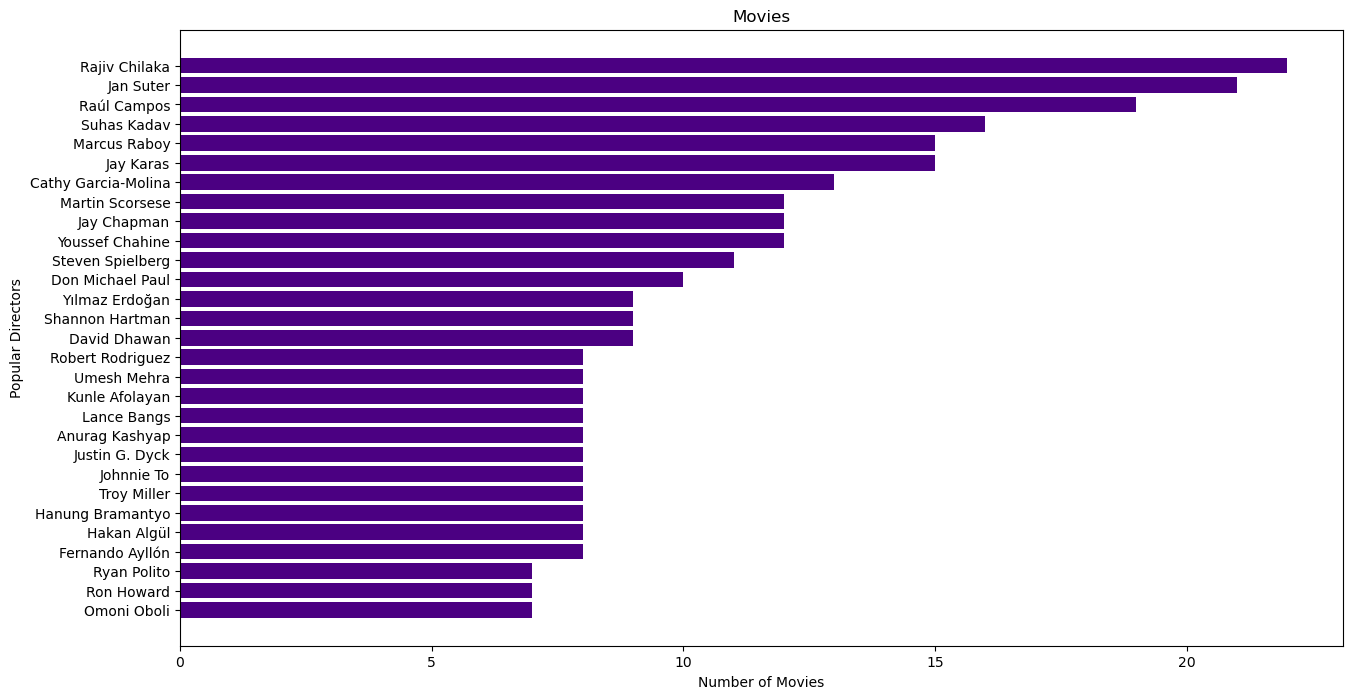

In [156]:
df_directors=df_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.title("Movies")
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

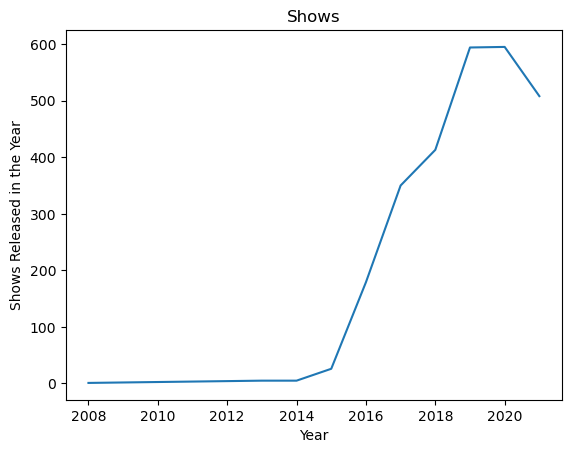

In [157]:
df_year=df_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.title("Shows")
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

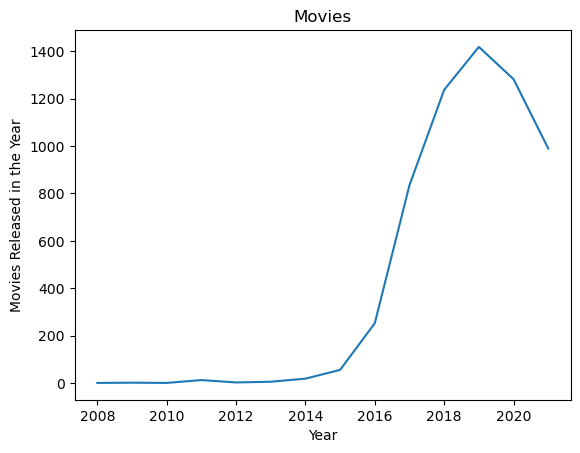

In [158]:
df_year=df_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.title("Movies")
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

Till 2019, overall content across Netflix was increasing but due to Covid in 2020, though TV Shows didn't take
a hit then Movies did take a hit. Well later in 2021, content across both was reduced significantly

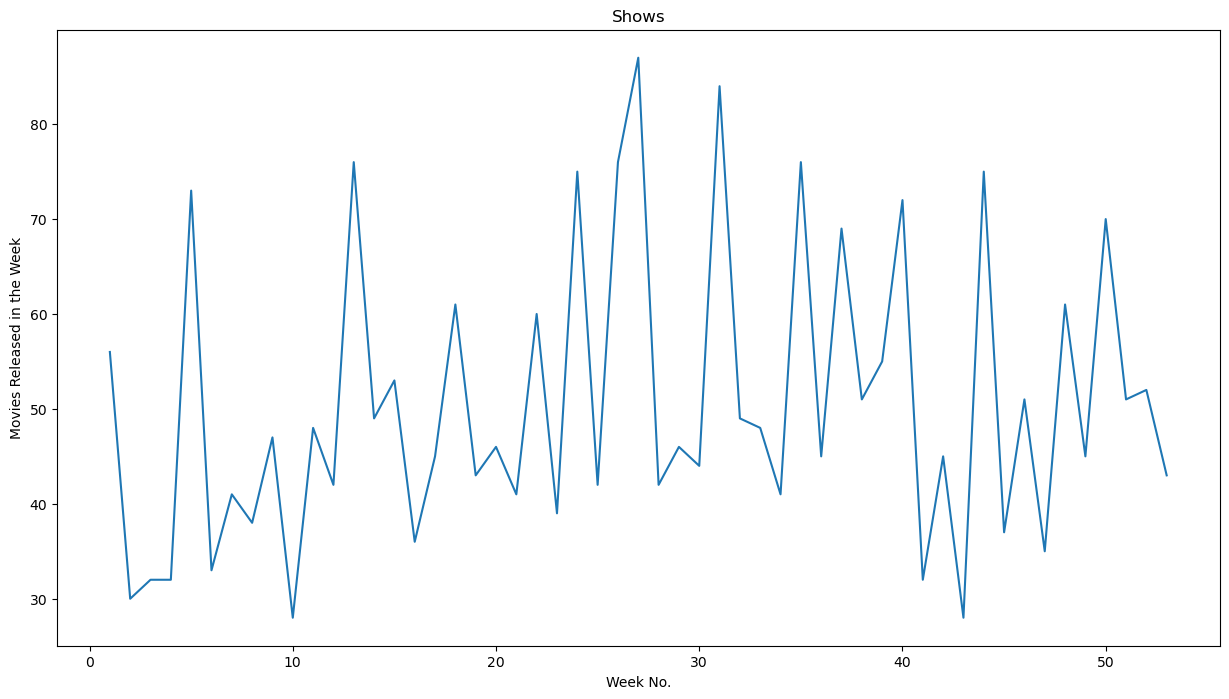

In [159]:
df_week=df_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.title("Shows")
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

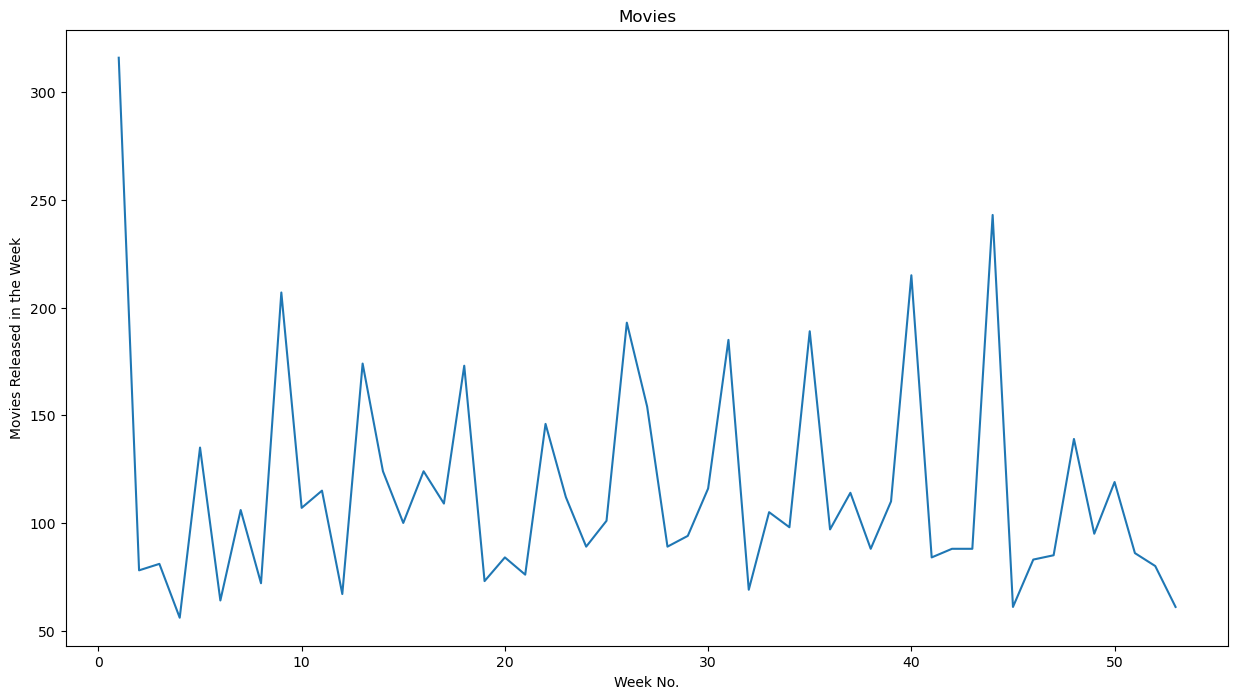

In [160]:
df_week=df_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.title("Movies")
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

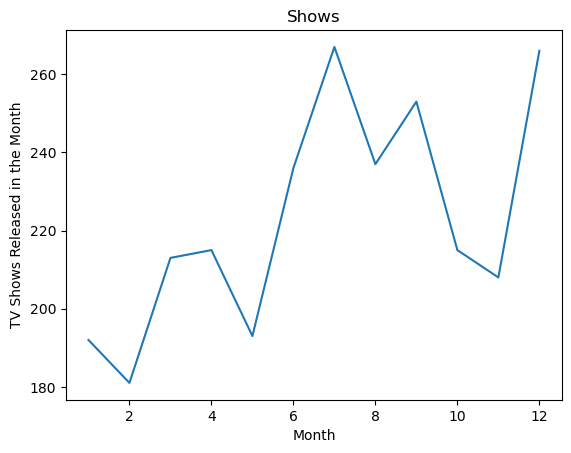

In [161]:
df_month=df_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.title("Shows")
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

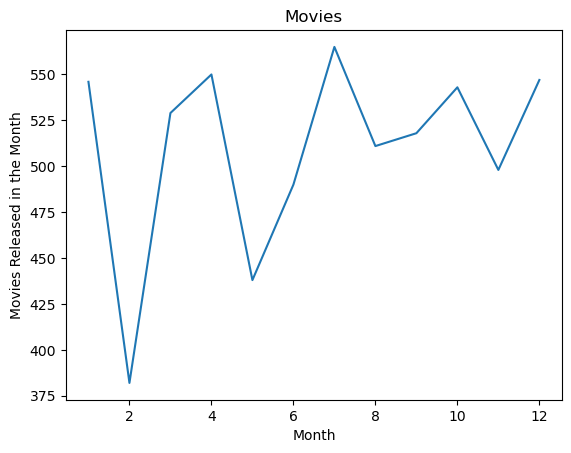

In [162]:
df_month=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.title("Movies")
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July
Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of
next year

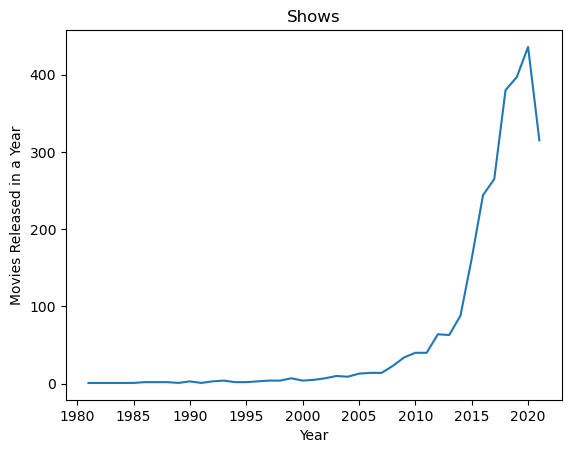

In [173]:
df_release_year=df_shows[df_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"})
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.title("Shows")
plt.ylabel("Movies Released in a Year")
plt.xlabel("Year")
plt.show()

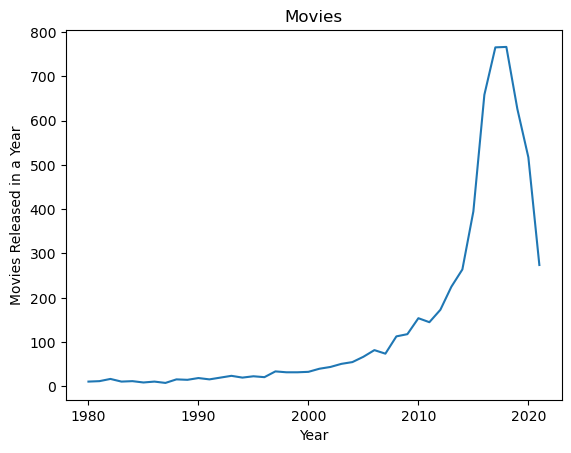

In [171]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"})
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.title("Movies")
plt.ylabel("Movies Released in a Year")
plt.xlabel("Year")
plt.show()

Actual Releases of both TV Shows and Movies have taken a hit after 2020